In [2]:
import subprocess,os,mmap,sys
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from pathlib import Path
import itertools

from ase.io import read
from ase.visualize import view
from ase.build import surface
import ase.calculators.castep
import ase.io.castep

from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.symmetry.kpath import KPathSetyawanCurtarolo,KPathLatimerMunro
from pymatgen.electronic_structure.dos import *
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer


from optados_plotting_functions import read_bands_file

# Plot MP grids

## Plot Cu100 1x1 vs 2x2 grids

In [4]:
bands_1x1 = read_bands_file('./OD_debug_files/Cu100_10L_PCvsSC/1x1/Cu100_1x1.bands.spec')
bands_2x2 = read_bands_file('./OD_debug_files/Cu100_10L_PCvsSC/2x2/Cu100_2x2.bands.spec')

In [66]:
bands_2x2['reciprocal_lattice']

array([[1.25827625, 0.        , 0.        ],
       [0.        , 1.25827625, 0.        ],
       [0.        , 0.        , 0.1256637 ]])

In [80]:
1/256

0.00390625

In [72]:
sum(bands_2x2['weights']/np.nanmin(bands_2x2['weights']))

256.0

In [7]:
len(bands_2x2['weights'])

130

In [10]:
filtered_2x2 = bands_2x2['kpt_cart'][bands_2x2['weights']/np.nanmin(bands_2x2['weights']) < 2.0]

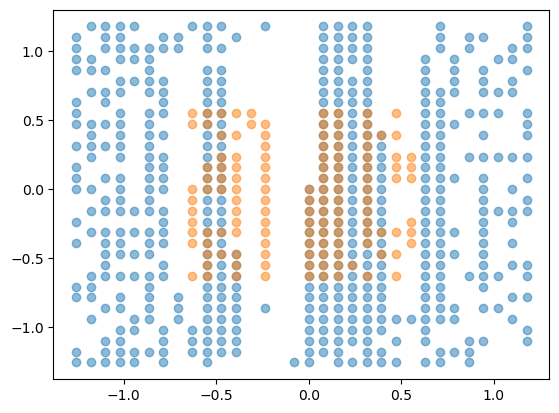

In [13]:
plt.scatter(bands_1x1['kpt_cart'][:,0],bands_1x1['kpt_cart'][:,1],alpha=0.5)
plt.scatter(bands_2x2['kpt_cart'][:,0],bands_2x2['kpt_cart'][:,1],alpha=0.5)

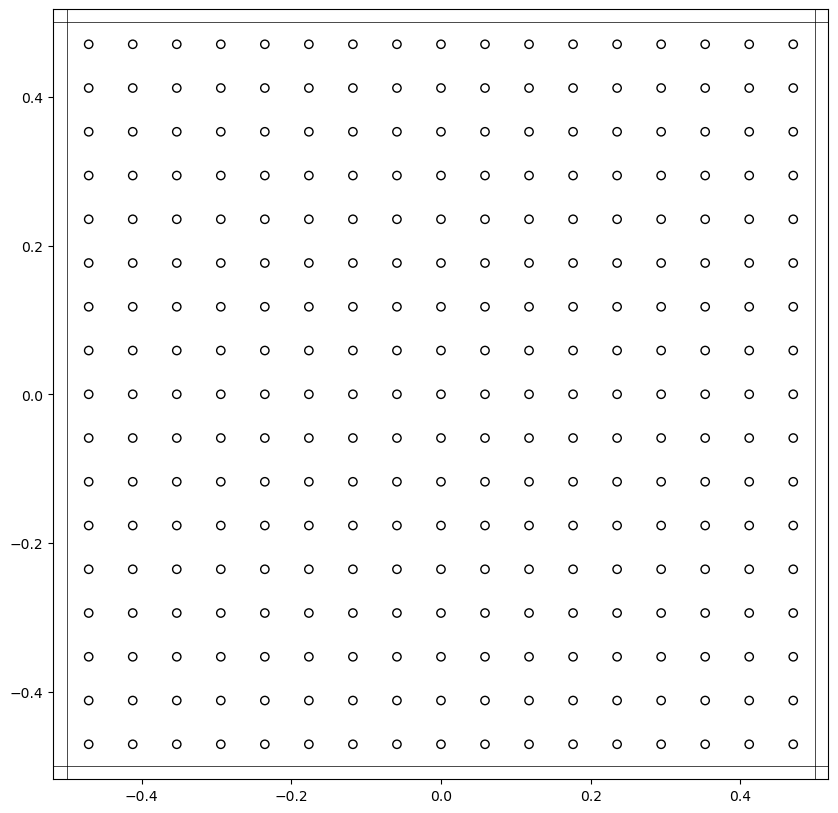

In [94]:
x,y = [],[]
a = 17
for i in range(a):
    x.append((2*(i+1)-a-1)/(2*a))
    y.append((2*(i+1)-a-1)/(2*a))
fig,ax = plt.subplots(1,1,figsize=(10,10))
pts = itertools.product(x, y)
ax.scatter(*zip(*pts), marker='o',edgecolor='k',facecolors='none',zorder=2)
for i in [-.5,.5]:   
    ax.axhline(i,linewidth=0.5,c='k')
    ax.axvline(i,linewidth=0.5,c='k')

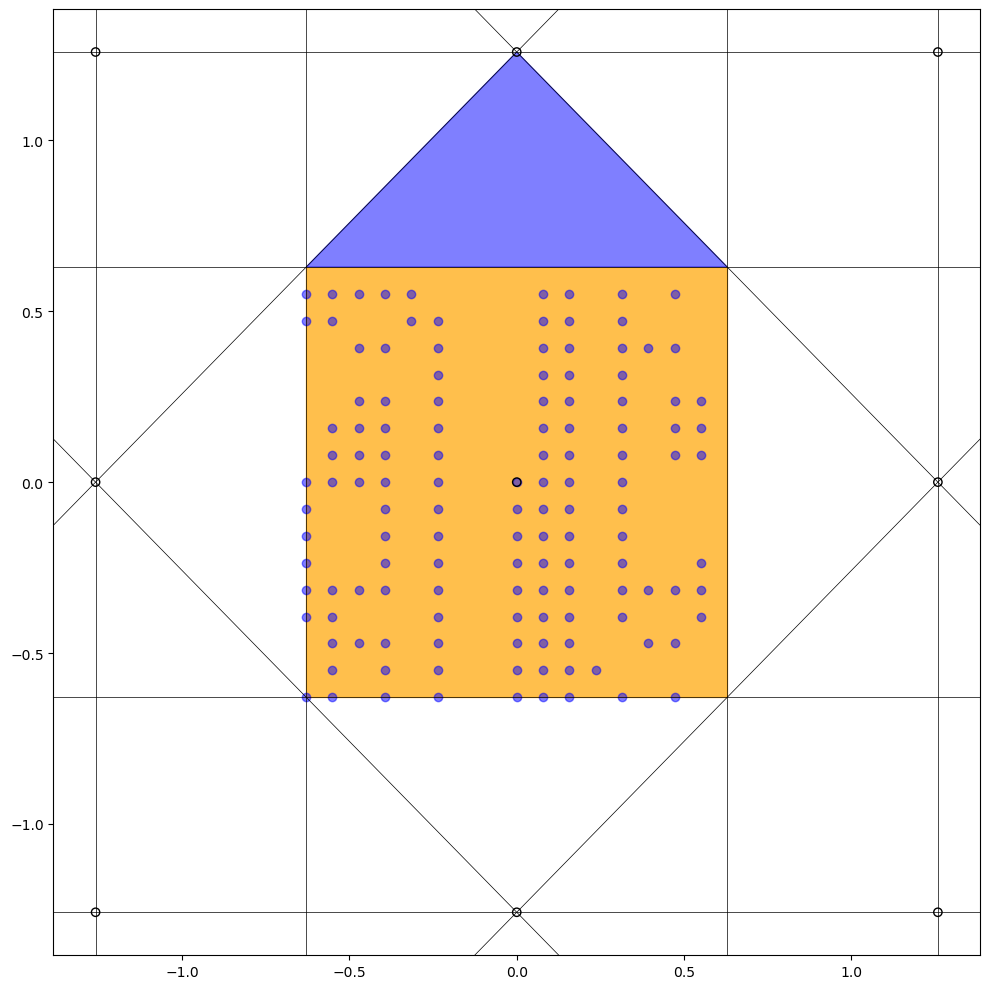

In [12]:
a = 1.25827625
b = a 
fig,ax = plt.subplots(1,1,figsize=(10,10))
x = np.linspace(-1*a,1*a,3)
y = np.linspace(-1*a,1*a,3)
pts = itertools.product(x, y)
ax.scatter(*zip(*pts), marker='o',edgecolor='k',facecolors='none',zorder=2)
for i in [-1*a,-.5*a,.5*a,1*a]:   
    ax.axhline(i,linewidth=0.5,c='k')
    ax.axvline(i,linewidth=0.5,c='k')
ax.axline((-1*a,0),slope=1,linewidth=0.5,c='k')
ax.axline((1*a,0),slope=1,linewidth=0.5,c='k')
ax.axline((-1*a,0),slope=-1,linewidth=0.5,c='k')
ax.axline((1*a,0),slope=-1,linewidth=0.5,c='k')
ax.fill([-.5*a,-.5*a,.5*a,.5*a],[-.5*a,.5*a,.5*a,-.5*a],alpha=.7,color='orange',zorder=1)
ax.fill([-.5*a,0,0.5*a],[.5*a,1*a,.5*a],alpha=.5,color='b',zorder=1)
ax.scatter(bands_2x2['kpt_cart'][:,0],bands_2x2['kpt_cart'][:,1],alpha=0.5,c='b')
# ax.scatter(bands_1x1['kpt_cart'][:,0],bands_1x1['kpt_cart'][:,1],alpha=0.5,c='g')
# plt.vlines([-1,-0.5,0.5,1],ymin = -2,ymax = 2,colors='k')
# plt.hlines([-1,-0.5,0.5,1],xmin = -2,xmax = 2,colors='k')
plt.tight_layout()
plt.savefig('./1x1.png',dpi=250)